<a href="https://colab.research.google.com/github/gabrielmelendez779/proyectos/blob/master/first_image_clasif_tf_docu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

My first Neural Net are some notes about the post in tensorflow page,the best way to learn is involve yourself  with the ideas.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.2.0


goog at first we must to begin with the basics in tensorflow.

In [4]:
fashion_mnist=keras.datasets.fashion_mnist
## de data comes in packages
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

by next we must to select an image for show

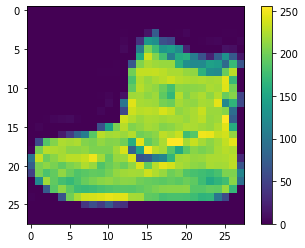

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

its important to consider that all transformations done in the train set must be done in the test set.how i cant notice that the images had de same scale of color. They find 255 and divide the intire set's by that scalar

In [13]:
train_images = train_images / 255.0

test_images = test_images / 255.0

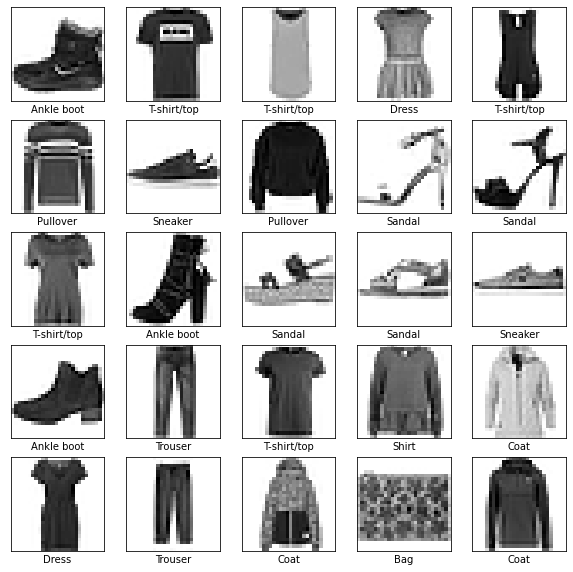

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

the code chunk iterates by the first 25 images and put then the label related in order with  plt.xlabel(class_names[train_labels[i]])

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

so, we construct a sequential model, with two hiden layers. notice that, in the output layer we have neurons as much as class labels plus one.


In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Here we compile the model it's necesary setting the following info:
which optimzer? R: Adam some reference about adam optimizer: https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c and the next paper:https://arxiv.org/pdf/1412.6980.pdf 

over which loss funtion: sparsecategoricalcrossentropy https://cwiki.apache.org/confluence/display/MXNET/Multi-hot+Sparse+Categorical+Cross-entropy#:~:text=Definition,only%20belong%20to%20one%20class. The main difference with Categorical Cross Entropy is the shape of the label vector, if you have a binary clasification problem you have the same expression.

The next step is train the model. 

In [41]:
model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4222 - accuracy: 0.8515
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4157 - accuracy: 0.8536
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4097 - accuracy: 0.8558
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4053 - accuracy: 0.8577
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4001 - accuracy: 0.8592
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3966 - accuracy: 0.8604
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3921 - accuracy: 0.8627
Epoch 8/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3882 - accuracy: 0.8632
Epoch 9/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3845 - accuracy: 0.8644
Epoch 10/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.381

now evaluate this basic model

In [42]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.3660 - accuracy: 0.8710

Test accuracy: 0.8709999918937683


In [43]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

Before we draw predictions 

In [44]:
predictions[0]

array([1.6750183e-08, 1.5722215e-10, 1.2816885e-06, 9.5748999e-07,
       4.3110172e-06, 6.4811103e-02, 1.5331524e-06, 2.7952541e-02,
       1.8171659e-03, 9.0541106e-01], dtype=float32)

In [45]:
np.argmax(predictions[0])


9

In [46]:
predictions.shape


(10000, 10)

important note that if i select the argmax() it returns the indexvalue which is maximal of the array [1.2275562e-07, 8.9534730e-08, 7.6224147e-09, 1.9726743e-08,
       6.1515345e-07, 4.6329503e-03, 4.1164008e-06, 1.5043605e-02,
       2.8817641e-07, 9.8031825e-01], this vector is the probability of being clasify in one of the 10 posible clases, in this case, the prob is maximize in the 10th which index is 9, and the prob=0.9803

In [47]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

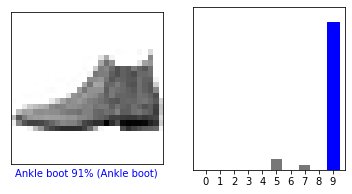

In [48]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

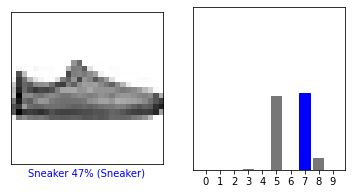

In [49]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

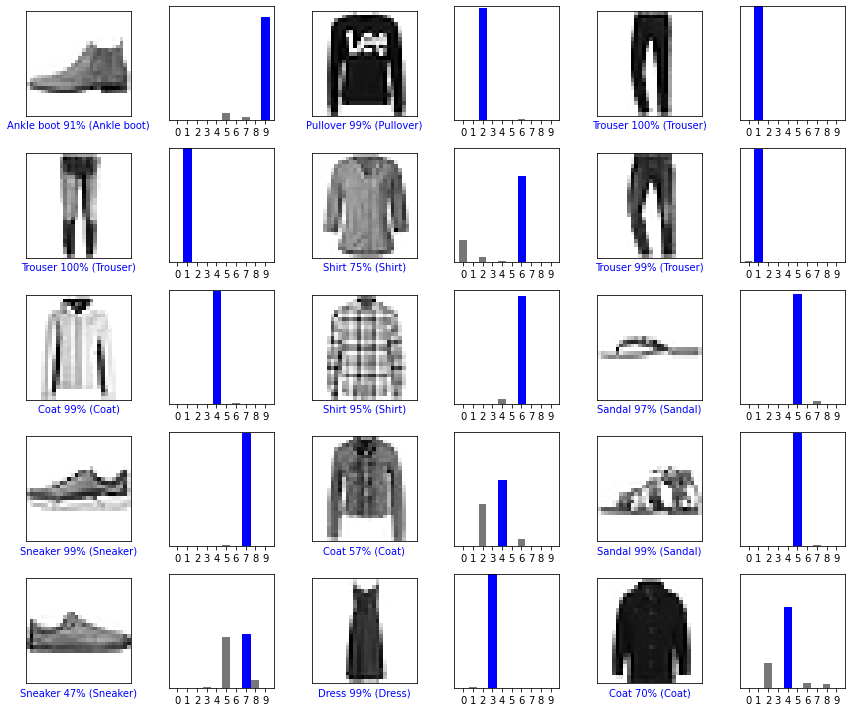

In [50]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

use the model 

In [51]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [52]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)




(1, 28, 28)


In [53]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.5100907e-04 2.7085550e-08 9.8850179e-01 7.6548179e-07 2.7861942e-03
  2.1978957e-14 8.5577117e-03 2.1395154e-23 2.4726603e-06 9.6762922e-20]]


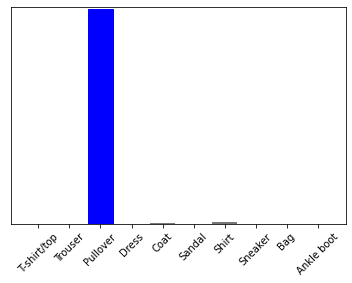

In [54]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [55]:
np.argmax(predictions_single[0])

2